# The Final Tutorial : What Makes a Good Headline?
### The results will shock you!


In [1]:
!pip install webhoseio

Code used to gather data: 

    import pandas as pd
    import webhoseio

    # put your own webhoseio api key in the my_api_key variable.
    # (run api_key.py is to prevent the key from being shown publicly on github)
    # There will be a error, but it won't affect anything.

    my_api_key = ""
    %run api_key.py

    # Try to avoid re-running this one alot we have 1000 queries max.

    webhoseio.config(token=my_api_key)
    query_params = {
        "q": "language:english site_type:news social.facebook.likes:>500",
        "ts": "1542059049078",
        "sort": "social.facebook.likes"
        }
        
    output = webhoseio.query("filterWebContent", query_params)
    
    
    i = 0
    t = 838
    data_persons = [] 
    data_organizations = []
    data_locations = []
    data_notags = []
    for x_r in range(t):

        for post in output['posts']:
            d_base = {
                    'title' : post['thread']['title'],
                    'fb_likes' : post['thread']['social']['facebook']['likes'],
                    'fb_comments' : post['thread']['social']['facebook']['comments'],
                    'fb_shares' : post['thread']['social']['facebook']['shares'],
                    'spam_score' : post['thread']['spam_score'],
                    'performance_score' : post['thread']["performance_score"],
                    'domain_rank' : post['thread']['domain_rank'],
                    'site' : post['thread']['site'],
                    'uuid' : post['thread']['uuid']
                }
            data_notags.append(d_base)
            for person in post['entities']['persons']:
                d_p = d_base.copy()
                d_p['tag'] = person['name']
                d_p['sentiment'] = person['sentiment']
                data_persons.append(d_p)
            for organization in post['entities']['organizations']:
                d_o = d_base.copy()
                d_o['tag'] = organization['name']
                d_o['sentiment'] = organization['sentiment']
                data_organizations.append(d_o)
            for location in post['entities']['locations']:
                d_l = d_base.copy()
                d_l['tag'] = location['name']
                d_l['sentiment'] = organization['sentiment']
                data_locations.append(d_l)
        i = i+1
        print(str(i*100) + ' / 83850')
        output = webhoseio.get_next()


    df_persons = pd.DataFrame(data_persons)
    df_organizations = pd.DataFrame(data_organizations)
    df_locations = pd.DataFrame(data_locations)
    df_all = pd.DataFrame(data_persons+data_organizations+data_locations)
    df_notags = pd.DataFrame(data_notags)
    display(df_all)

Then we saved the data to CSVs for later use. 
We import these CSVs into dataframes.

    df_dict = {"df_persons":df_persons,
               "df_organizations":df_organizations,
               "df_locations":df_locations,
               "df_all":df_all,
               "df_notags":df_notags}
    for k, v in df_dict.items():
        v.to_csv(k+".csv")

Let's import each CSV into a dataframe by essentially doing the reverse process.

In [6]:
import pandas as pd
df_persons = pd.read_csv("df_persons"+".csv").drop(['Unnamed: 0'], axis=1)
df_organizations = pd.read_csv("df_organizations"+".csv").drop(['Unnamed: 0'], axis=1)
df_locations = pd.read_csv("df_locations"+".csv").drop(['Unnamed: 0'], axis=1)
df_all = pd.read_csv("df_all"+".csv").drop(['Unnamed: 0'], axis=1)
df_notags = pd.read_csv("df_notags"+".csv").drop(['Unnamed: 0'], axis=1)


display(df_all)

,domain_rank,fb_comments,fb_likes,fb_shares,performance_score,sentiment,site,spam_score,tag,title,uuid
0,3307.0,51145,297156,19368,10,negative,newsweek.com,0.672,alexandria ocasio-cortez,Alexandria Ocasio-Cortez Wants to Replace Colu...,6110cf3b1a50615ebacd4189abd4c2b143c28278
1,3307.0,51145,297156,19368,10,none,newsweek.com,0.672,david martosko,Alexandria Ocasio-Cortez Wants to Replace Colu...,6110cf3b1a50615ebacd4189abd4c2b143c28278
2,3307.0,51145,297156,19368,10,none,newsweek.com,0.672,martosko,Alexandria Ocasio-Cortez Wants to Replace Colu...,6110cf3b1a50615ebacd4189abd4c2b143c28278
3,3307.0,51145,297156,19368,10,none,newsweek.com,0.672,ocasio-cortez,Alexandria Ocasio-Cortez Wants to Replace Colu...,6110cf3b1a50615ebacd4189abd4c2b143c28278
4,3307.0,51145,297156,19368,10,none,newsweek.com,0.672,christopher columbus,Alexandria Ocasio-Cortez Wants to Replace Colu...,6110cf3b1a50615ebacd4189abd4c2b143c28278
5,139.0,147614,249425,36600,10,negative,huffingtonpost.com,0.000,trump,Every President Recited This Prayer Except Tru...,d13abf959e176105e8be4a8715f4e74434eb2cfc
6,139.0,147614,249425,36600,10,none,huffingtonpost.com,0.000,michael b. jordan,Every President Recited This Prayer Except Tru...,d13abf959e176105e8be4a8715f4e74434eb2cfc
7,139.0,147614,249425,36600,10,none,huffingtonpost.com,0.000,donald trump,Every President Recited This Prayer Except Tru...,d13abf959e176105e8be4a8715f4e74434eb2cfc
8,139.0,147614,249425,36600,10,none,huffingtonpost.com,0.000,george h. w. bush,Every President Recited This Prayer Except Tru...,d13abf959e176105e8be4a8715f4e74434eb2cfc
9,139.0,147614,249425,36600,10,none,huffingtonpost.com,0.000,stallone,Every President Recited This Prayer Except Tru...,d13abf959e176105e8be4a8715f4e74434eb2cfc


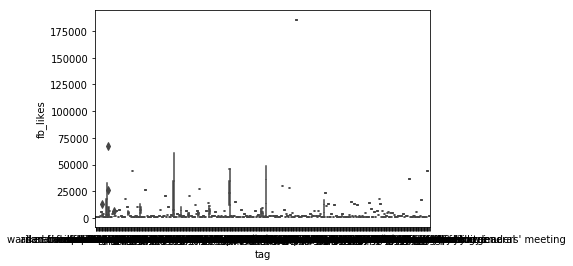

In [7]:
# naive approach - each tag is independent
import seaborn as sns
sns.boxplot(x="tag", y="fb_likes", data = df_all.sample(n=500))


In [9]:
# Clearly there's something to it, but there's also lots of variance here... 
# and assuming tags interact we probably need to do a Random Forest
# To get there, it's a good idea to start with converting each tag to a frequency table per uuid
display(df_all['uuid'])
display(df_)
freq_table = pd.crosstab(df_all['uuid'],df_all['tag'] )

# Import train_test_split function
from sklearn.model_selection import train_test_split

freq_table_and_data = freq_table.join(df_notags.set_index('uuid'), on='uuid')

X=freq_table  # Features
y=freq_table_and_data['fb_likes']  # Labels
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) # 70% training and 30% test

ValueError: negative dimensions are not allowed

In [ ]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=500)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

In [ ]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))